# **New York City Yellow Taxi Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [16]:
# Import the libraries you will be using for analysis

# Core data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Geospatial analysis
import geopandas as gpd

# For datetime operations
from datetime import datetime

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [18]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# Already completed the import at the starting of the starter notebook.

In [19]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignment/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        # Ensure pickup datetime is in datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        unique_dates = monthly_data['date'].unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            date_df = monthly_data[monthly_data['date'] == date]


            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = date_df[date_df['tpep_pickup_datetime'].dt.hour == hour]


                # add data of this hour to the dataframe

                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:
                    hourly_sample = hourly_df.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, hourly_sample], ignore_index=True)




        # Concatenate the sampled data of all the dates to a single dataframe
        df =  pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file sampled_tripdata_2023.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [20]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv("/content/drive/MyDrive/Assignment/Datasets and Dictionary/trip_records/sampled_tripdata_2023.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

In [12]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date Airport_fee  
0  2023-01-01         NaN  
1  2023-01-01         NaN  
2  2023-01-01         NaN  
3  2023-01-01         NaN  
4  2023-01-01         NaN  

[5 rows x 21 columns]

In [21]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [22]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns
df.columns = df.columns.str.strip()
print(df.columns.tolist())
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    df.drop(columns=['Airport_fee'], inplace=True)
    df.info()

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'Airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount     

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [24]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]

# Show how many such records exist
print(f"Number of records with negative fare_amount: {negative_fares.shape[0]}")

# Display the first few records
negative_fares.head()


Number of records with negative fare_amount: 0


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [17]:
# Analyse RatecodeID for the negative fare amounts
df = pd.read_csv("/content/drive/MyDrive/Assignment/Datasets and Dictionary/trip_records/sampled_tripdata_2023.csv", parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])
negative_fares = df[df['fare_amount'] < 0]
# Count number of negative fares by RatecodeID
ratecode_counts = negative_fares['RatecodeID'].value_counts().sort_index()

# Display the result
print("RatecodeID distribution for trips with negative fare amounts:")
print(ratecode_counts)

RatecodeID distribution for trips with negative fare amounts:
Series([], Name: count, dtype: int64)


In [23]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number']).columns
negative_columns = []
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        negative_columns.append((col, negative_count))
        print("Columns with negative values:")
for col, count in negative_columns:
    print(f"{col}: {count} negative values")


Columns with negative values:
Columns with negative values:
Columns with negative values:
Columns with negative values:
Columns with negative values:
Columns with negative values:
extra: 3 negative values
mta_tax: 73 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
airport_fee: 15 negative values


In [25]:
# fix these negative values
# List of columns where negative values should be set to 0
columns_to_fix = [
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

# Replace negative values with 0
for col in columns_to_fix:
    negative_count = (df[col] < 0).sum()
    df[col] = df[col].apply(lambda x: x if x >= 0 else 0)
    print(f"Fixed {negative_count} negative values in '{col}'")


Fixed 3 negative values in 'extra'
Fixed 73 negative values in 'mta_tax'
Fixed 78 negative values in 'improvement_surcharge'
Fixed 78 negative values in 'total_amount'
Fixed 56 negative values in 'congestion_surcharge'
Fixed 15 negative values in 'airport_fee'


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [26]:
# Find the proportion of missing values in each column
# Total rows in the dataset
total_rows = len(df)

# Calculate missing value count and percentage
missing_info = df.isnull().sum().to_frame(name='Missing Count')
missing_info['Missing %'] = (missing_info['Missing Count'] / total_rows * 100).round(2)

# Filter only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0]

# Display the result
print("Missing values summary:")
print(missing_info)



Missing values summary:
                    Missing Count  Missing %
passenger_count             64874       3.42
RatecodeID                  64874       3.42
store_and_fwd_flag          64874       3.42


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [32]:
# Display the rows with null values
null_rows = df[df.isnull().any(axis=1)]
print(f"Number of rows with missing values: {null_rows.shape[0]}")
null_rows.head()
# Impute NaN values in 'passenger_count'
most_common_passenger_count = df['passenger_count'].mode()[0]
print(f"Most common passenger count: {most_common_passenger_count}")
df['passenger_count'].fillna(most_common_passenger_count, inplace=True)

print("Missing values in 'passenger_count' have been filled.")
print("Remaining nulls in 'passenger_count':", df['passenger_count'].isnull().sum())
df.head()

Number of rows with missing values: 64874
Most common passenger count: 1.0
Missing values in 'passenger_count' have been filled.
Remaining nulls in 'passenger_count': 0


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

         date  
0  2023-01-01  
1  2023-01-01  
2  2023-01-01  
3  2023-01-01  
4  2023-01-01

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [34]:
# Fix missing values in 'RatecodeID'
# Find the most common RatecodeID
most_common_ratecode = df['RatecodeID'].mode()[0]
print(f" Most common RatecodeID: {most_common_ratecode}")
df['RatecodeID'].fillna(most_common_ratecode, inplace=True)
print("Missing values in 'RatecodeID' have been filled.")
df.head()

 Most common RatecodeID: 1.0
Missing values in 'RatecodeID' have been filled.


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                NaN            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

         date  
0  2023-01-01  
1  2023-01-01  
2  2023-01-01  
3  2023-01-01  
4  2023-01-01

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [36]:
# handle null values in congestion_surcharge
null_count = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {null_count}")

Missing values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [37]:
# Handle any remaining missing values
remaining_nulls = df.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]
print("Remaining columns with missing values:")
print(remaining_nulls)


Remaining columns with missing values:
store_and_fwd_flag    64874
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [45]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()
print("Unique values in 'passenger_count':")
print(df['passenger_count'].value_counts().sort_index())
# Step 1: Replace 0 with 1
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1
# Step 2: Replace values > 6 with 6 (or drop them)
df.loc[df['passenger_count'] > 6, 'passenger_count'] = 6
print("'passenger_count' cleaned: replaced 0 with 1, and capped values > 6 at 6.")
df = df[df['passenger_count'] <= 6]

Unique values in 'passenger_count':
passenger_count
1.0    1471779
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15881
Name: count, dtype: int64
'passenger_count' cleaned: replaced 0 with 1, and capped values > 6 at 6.


In [46]:
# trip distanceUsually ranges from 0.5 to 20 miles, rarely more.
print("Trip distance stats:")
print(df['trip_distance'].describe())

# Check suspicious entries
print("\nTrips with distance > 50 miles:")
print(df[df['trip_distance'] > 50].shape[0])

Trip distance stats:
count    1.896400e+06
mean     3.858293e+00
std      1.294085e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.790000e+00
75%      3.400000e+00
max      1.263605e+05
Name: trip_distance, dtype: float64

Trips with distance > 50 miles:
276


In [47]:
# Cap trip_distance to a maximum of 100 miles
df.loc[df['trip_distance'] > 100, 'trip_distance'] = 100
print(" Capped trip_distance values greater than 100 miles.")

 Capped trip_distance values greater than 100 miles.


In [48]:
# Remove rows with trip_distance == 0 or > 100
initial_shape = df.shape[0]
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]
removed_rows = initial_shape - df.shape[0]
print(f"Removed {removed_rows} rows with invalid trip distances.")

Removed 37732 rows with invalid trip distances.


In [49]:
#fare_amount Standard base fare is $2.50, most are under $100
print("Fare amount stats:")
print(df['fare_amount'].describe())

Fare amount stats:
count    1.858668e+06
mean     1.980461e+01
std      1.065062e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64


In [51]:
# Cap fare_amount at a reasonable max, e.g., $500
df.loc[df['fare_amount'] > 500, 'fare_amount'] = 500
print("Capped 'fare_amount' to a maximum of $500.")

Capped 'fare_amount' to a maximum of $500.


In [52]:
# Check zero-fare trips
zero_fare = df[df['fare_amount'] == 0]

# Analyze their payment_type
print(zero_fare['payment_type'].value_counts())

payment_type
2    158
3     66
4     64
1     28
0     10
Name: count, dtype: int64


In [53]:
# Remove zero-fare trips that don't have valid reasons
valid_payment_types = [3, 4, 6]  # No charge, Dispute, Voided trip
df = df[~((df['fare_amount'] == 0) & (~df['payment_type'].isin(valid_payment_types)))]

print(" Removed invalid zero-fare trips.")

 Removed invalid zero-fare trips.


In [54]:
# Cleaning payment type
print("Unique payment types:")
print(df['payment_type'].value_counts())

invalid_payment_types = df[~df['payment_type'].isin([1, 2, 3, 4, 5, 6])]
print(f"\nInvalid payment types found: {invalid_payment_types.shape[0]}")

Unique payment types:
payment_type
1    1479348
2     309814
0      50164
4      12287
3       6859
Name: count, dtype: int64

Invalid payment types found: 50164


In [55]:
# Drop rows with invalid payment_type
invalid_count = df[df['payment_type'] == 0].shape[0]
df = df[df['payment_type'] != 0]
print(f"Removed {invalid_count} rows with invalid payment_type (0).")

Removed 50164 rows with invalid payment_type (0).


In [2]:
df['payment_type'] = df['payment_type'].replace(0, 5)
print("Replaced invalid payment_type 0 with 5 .")

Replaced invalid payment_type 0 with 5 .


In [57]:
# cleaning ratecodeID
print("Unique RatecodeID values:")
print(df['RatecodeID'].value_counts())

invalid_ratecodes = df[~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]
print(f"\nInvalid RatecodeIDs found: {invalid_ratecodes.shape[0]}")

Unique RatecodeID values:
RatecodeID
1.0     1714792
2.0       69839
99.0       9303
3.0        5791
5.0        4880
4.0        3702
6.0           1
Name: count, dtype: int64

Invalid RatecodeIDs found: 9303


In [60]:
# Removing Invalid RatecodeIDs
invalid_ratecodes = df[df['RatecodeID'] == 99].shape[0]
df = df[df['RatecodeID'] != 99]
print(f"Removed {invalid_ratecodes} rows with invalid RatecodeID (99).")
most_common_valid_ratecode = df[df['RatecodeID'].isin([1,2,3,4,5,6])]['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].replace(99, most_common_valid_ratecode)
print(f"Replaced RatecodeID 99 with most common valid code: {most_common_valid_ratecode}")

Removed 0 rows with invalid RatecodeID (99).
Replaced RatecodeID 99 with most common valid code: 1.0


In [61]:
#cleaning store_and_fwd_flag
print("Unique store_and_fwd_flag values:")
print(df['store_and_fwd_flag'].value_counts())

Unique store_and_fwd_flag values:
store_and_fwd_flag
N    1788240
Y      10765
Name: count, dtype: int64


No unexpected or missing values

In [62]:
# Cleaning tip amount
print("Tip amount stats:")
print(df['tip_amount'].describe())

Tip amount stats:
count    1.799005e+06
mean     3.598784e+00
std      4.005004e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.880000e+00
75%      4.480000e+00
max      2.230800e+02
Name: tip_amount, dtype: float64


In [63]:
# Cap tip_amount at $100
df.loc[df['tip_amount'] > 100, 'tip_amount'] = 100
print(" Capped 'tip_amount' values over $100.")

 Capped 'tip_amount' values over $100.


In [64]:
df[df['tip_amount'] > 50][['fare_amount', 'tip_amount', 'payment_type']].sort_values(by='tip_amount', ascending=False).head(10)


fare_amount  tip_amount  payment_type
1775256        332.7       100.0             1
1769889         56.2       100.0             1
180236          19.1       100.0             1
247445          70.0       100.0             1
1503526         19.8       100.0             1
1556244         61.1       100.0             1
1614605        111.0       100.0             1
1674143         49.9       100.0             1
1250400         84.6       100.0             1
1286169         11.4       100.0             1

In [65]:
# cleaning total_amount
print("Total amount stats:")
print(df['total_amount'].describe())


Total amount stats:
count    1.799005e+06
mean     2.883326e+01
std      1.090912e+02
min      0.000000e+00
25%      1.596000e+01
50%      2.100000e+01
75%      3.060000e+01
max      1.431675e+05
Name: total_amount, dtype: float64


In [66]:
# Caping total_amount at $500
df.loc[df['total_amount'] > 500, 'total_amount'] = 500
print(" Capped 'total_amount' values over $500.")
zero_total = df[df['total_amount'] == 0]
print(f"Zero total_amount rows: {zero_total.shape[0]}")

# Look at their payment types
print(zero_total['payment_type'].value_counts())

 Capped 'total_amount' values over $500.
Zero total_amount rows: 57
payment_type
4    32
3    25
Name: count, dtype: int64


In [67]:
# Keep only if zero amount and valid "no-charge" payment types
valid_payment_types = [3, 4, 6]
df = df[~((df['total_amount'] == 0) & (~df['payment_type'].isin(valid_payment_types)))]

print(" Removed invalid zero-fare total_amount rows.")

 Removed invalid zero-fare total_amount rows.


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [68]:
# remove passenger_count > 6
# Completed in the above section itself however just pring the data here
print("Unique passenger_count values:")
print(df['passenger_count'].value_counts())

Unique passenger_count values:
passenger_count
1.0    1378903
2.0     274600
3.0      68286
4.0      37662
5.0      23755
6.0      15799
Name: count, dtype: int64


In [69]:
# Continue with outlier handling
# Completed in the above section itself however just printing the data here
print("Unique RatecodeID values:")
print(df['RatecodeID'].value_counts())


Unique RatecodeID values:
RatecodeID
1.0    1714792
2.0      69839
3.0       5791
5.0       4880
4.0       3702
6.0          1
Name: count, dtype: int64


In [ ]:
# Do any columns need standardising?
# Completed in the above section itself

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [70]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date']

In [71]:
categorical_cols = ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
                    'PULocationID', 'DOLocationID', 'payment_type']

numerical_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge', 'airport_fee']

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
Numerical Columns: ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [72]:
# Extract time-based features from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

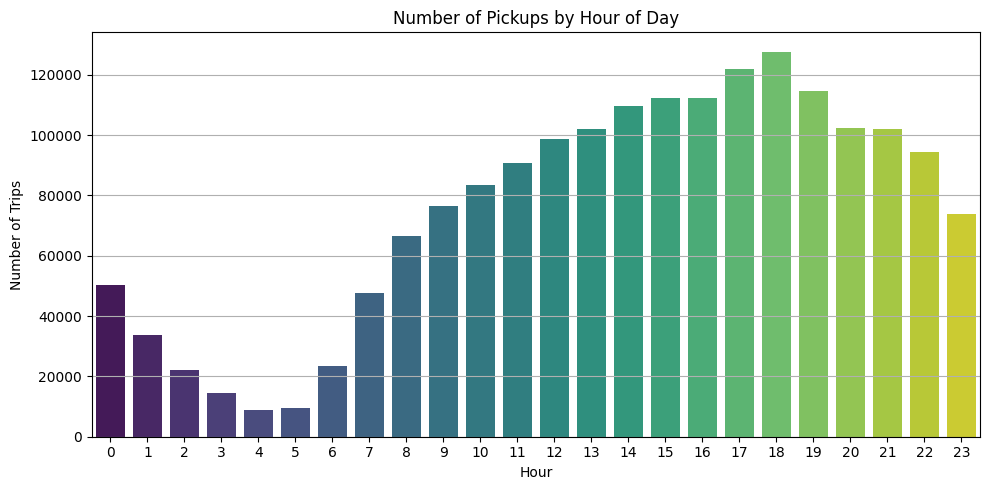

In [73]:
# Bar Chart for Pickup Distribution by Hour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour', palette='viridis')
plt.title("Number of Pickups by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

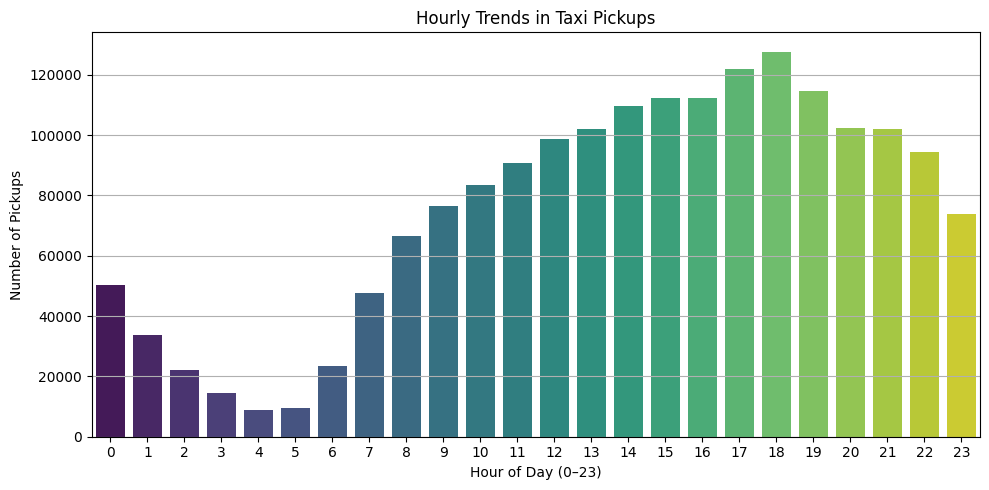

In [74]:
# Find and show the hourly trends in taxi pickups
# Extract hour from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour', palette='viridis')

plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


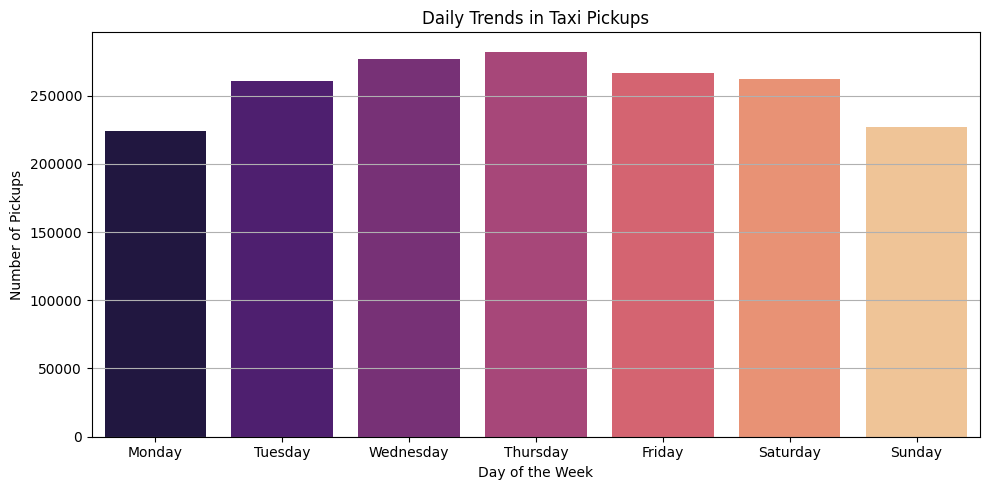

In [75]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day of the week from pickup datetime
df['weekday'] = df['tpep_pickup_datetime'].dt.day_name()
# Order days for correct weekday sequence
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weekday', order=weekday_order, palette='magma')

plt.title("Daily Trends in Taxi Pickups")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


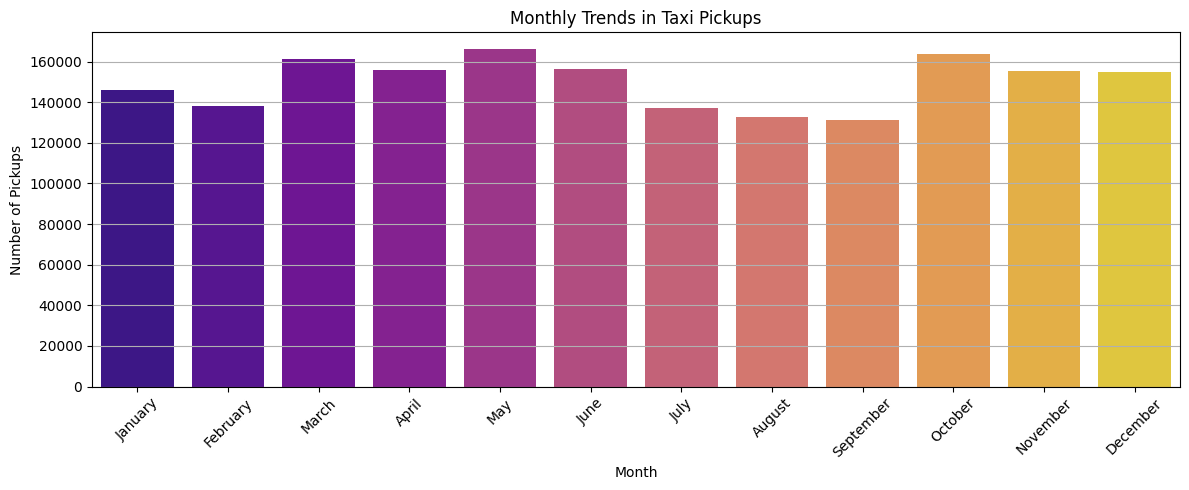

In [76]:
# Show the monthly trends in pickups
# Extract month name from pickup datetime
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='month', order=month_order, palette='plasma')

plt.title("Monthly Trends in Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [78]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f" {col} — Zeros: {zero_count}, Negatives: {negative_count}")


 fare_amount — Zeros: 130, Negatives: 0
 tip_amount — Zeros: 386079, Negatives: 0
 total_amount — Zeros: 57, Negatives: 0
 trip_distance — Zeros: 0, Negatives: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [79]:
# Create a df with non zero entries for the selected parameters.
df = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [80]:
# Group data by month and analyse monthly revenue
# Ensure 'month' column exists (string format)
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Optional: preserve correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and calculate total revenue
monthly_revenue = df.groupby('month')['total_amount'].sum().reindex(month_order)

# Preview the results
print("Monthly Revenue (Total Amount):")
print(monthly_revenue)



Monthly Revenue (Total Amount):
month
January      3975514.49
February     3756936.82
March        4528173.23
April        4448909.26
May          4845256.48
June         4559875.70
July         3962541.89
August       3849956.00
September    3936623.90
October      4853240.03
November     4515495.57
December     4492619.49
Name: total_amount, dtype: float64


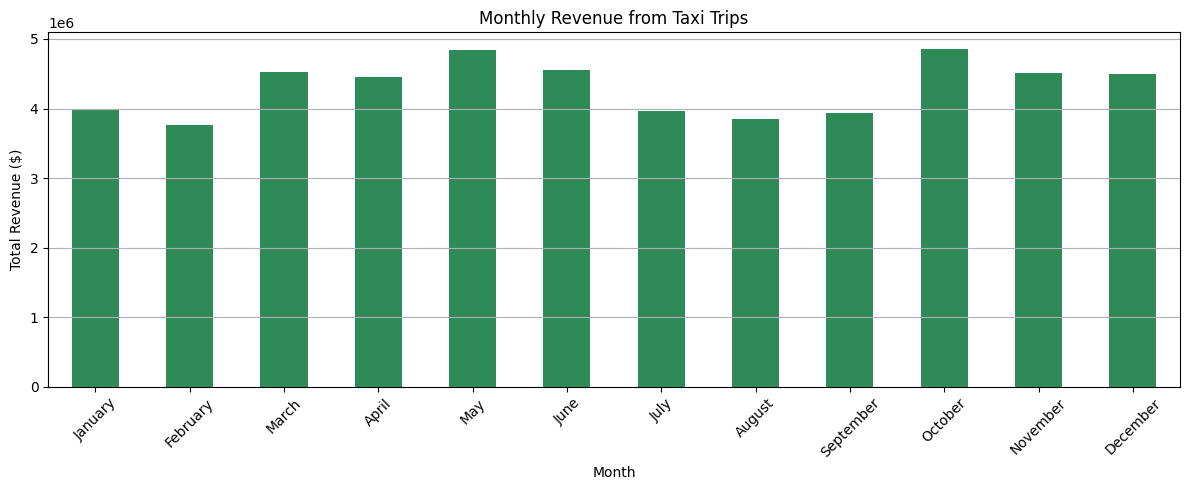

In [82]:
plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind='bar', color='seagreen')
plt.title("Monthly Revenue from Taxi Trips")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [84]:
# Calculate proportion of each quarter
# Create a 'quarter' column (Q1, Q2, Q3, Q4)
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').astype(str)
# Group total revenue by quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().sort_index()

# Display total revenue per quarter
print("Total Revenue by Quarter:")
print(quarterly_revenue)
# Calculate proportion as a percentage
quarterly_revenue_pct = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_revenue_pct = quarterly_revenue_pct.round(2)

print("\n Revenue Share (%) by Quarter:")
print(quarterly_revenue_pct)


Total Revenue by Quarter:
quarter
2022Q4          13.50
2023Q1    12260624.54
2023Q2    13854041.44
2023Q3    11749121.79
2023Q4    13861341.59
Name: total_amount, dtype: float64

 Revenue Share (%) by Quarter:
quarter
2022Q4     0.00
2023Q1    23.70
2023Q2    26.78
2023Q3    22.71
2023Q4    26.80
Name: total_amount, dtype: float64


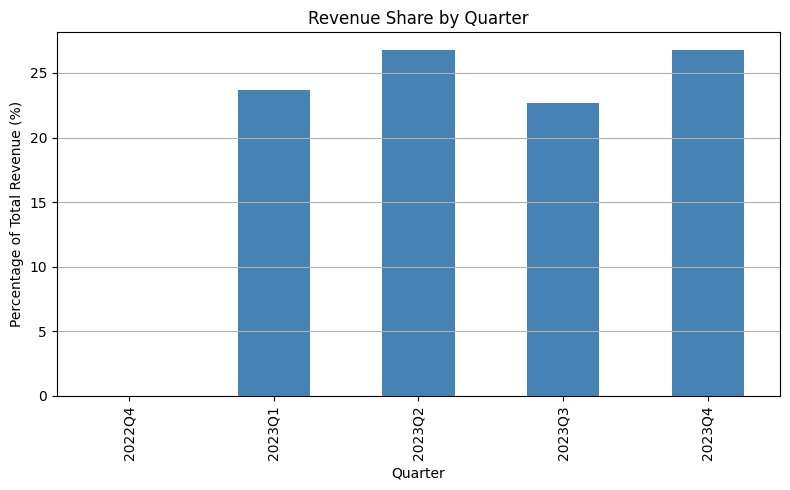

In [85]:
plt.figure(figsize=(8, 5))
quarterly_revenue_pct.plot(kind='bar', color='steelblue')
plt.title("Revenue Share by Quarter")
plt.ylabel("Percentage of Total Revenue (%)")
plt.xlabel("Quarter")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [88]:
# Show how trip fare is affected by distance
# Create distance bins
df_distance_fare = df[df['trip_distance'] > 0].copy()
bins = [0, 1, 2, 3, 5, 7, 10, 15, 20, 30, 50, 100]
labels = ['0-1', '1-2', '2-3', '3-5', '5-7', '7-10', '10-15', '15-20', '20-30', '30-50', '50-100']
df_distance_fare['distance_bin'] = pd.cut(df_distance_fare['trip_distance'], bins=bins, labels=labels)
# Group by distance bin and calculate mean fare
avg_fare_by_distance = df_distance_fare.groupby('distance_bin')['fare_amount'].mean()
print("Average fare by distance bin:")
print(avg_fare_by_distance)


Average fare by distance bin:
distance_bin
0-1         7.984805
1-2        11.849902
2-3        16.725869
3-5        22.648732
5-7        30.148384
7-10       39.304843
10-15      51.880141
15-20      71.174567
20-30      81.648894
30-50     164.537946
50-100    277.710747
Name: fare_amount, dtype: float64


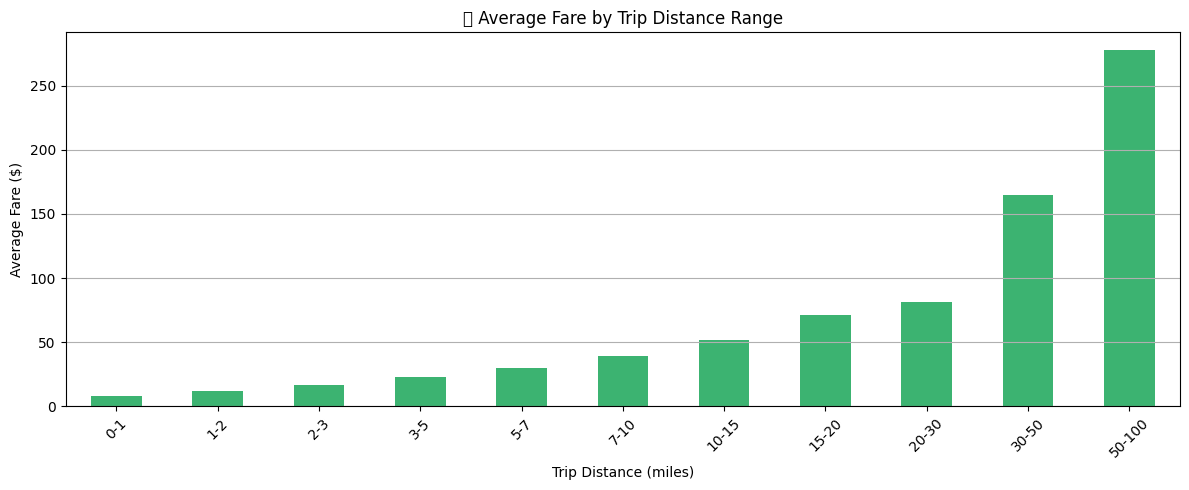

In [89]:
plt.figure(figsize=(12, 5))
avg_fare_by_distance.plot(kind='bar', color='mediumseagreen')

plt.title("💵 Average Fare by Trip Distance Range")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Fare ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

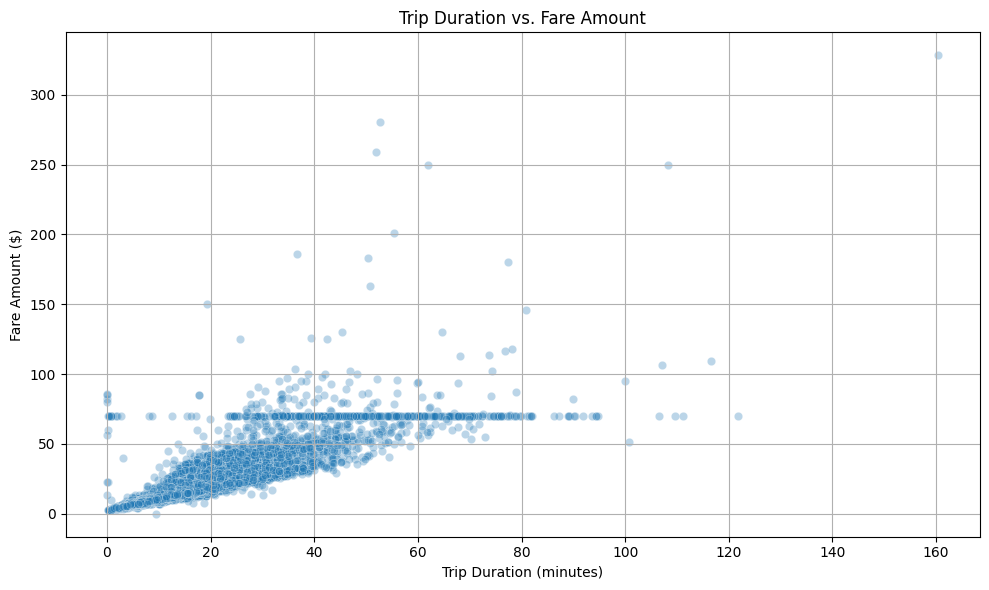

In [91]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
# Filter unrealistic durations
df_duration_fare = df[(df['trip_duration_min'] > 0) & (df['trip_duration_min'] <= 180)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_duration_fare.sample(10000, random_state=42),
    x='trip_duration_min',
    y='fare_amount',
    alpha=0.3
)

plt.title("Trip Duration vs. Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Average fare by passenger count:
passenger_count
1.0    18.898218
2.0    22.028379
3.0    21.717197
4.0    23.045024
5.0    18.830288
6.0    19.125103
Name: fare_amount, dtype: float64


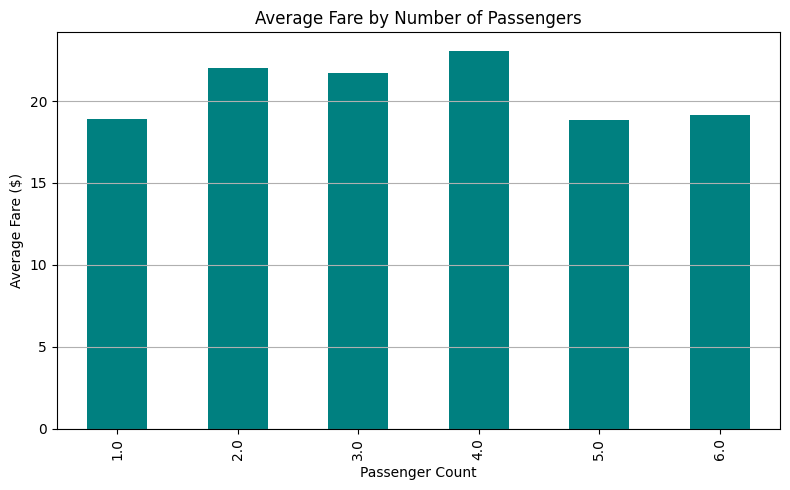

In [92]:
# Show relationship between fare and number of passengers
# Group by passenger count and calculate mean fare
fare_by_passenger = df.groupby('passenger_count')['fare_amount'].mean().sort_index()

# Display result
print(" Average fare by passenger count:")
print(fare_by_passenger)
plt.figure(figsize=(8, 5))
fare_by_passenger.plot(kind='bar', color='teal')

plt.title("Average Fare by Number of Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


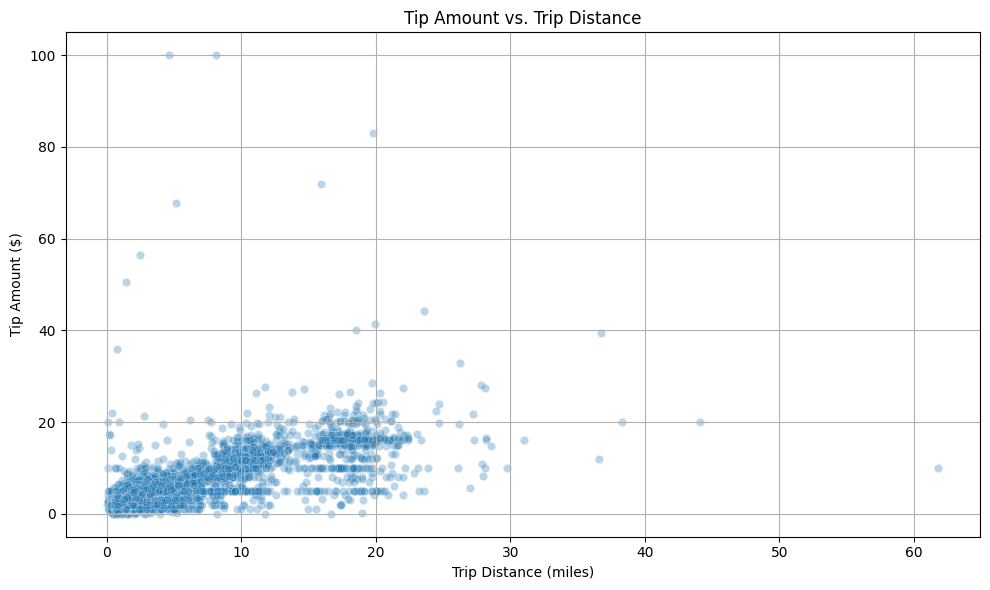

Correlation between trip distance and tip amount: 0.80


In [95]:
# Show relationship between tip and trip distance
df_tip_distance = df[(df['tip_amount'] > 0) & (df['trip_distance'] > 0)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_tip_distance.sample(10000, random_state=42),
    x='trip_distance',
    y='tip_amount',
    alpha=0.3
)
plt.title("Tip Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = df_tip_distance['trip_distance'].corr(df_tip_distance['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
payment_type
Credit card    1470045
Cash            309814
No charge         6793
Dispute          12223
Name: count, dtype: int64


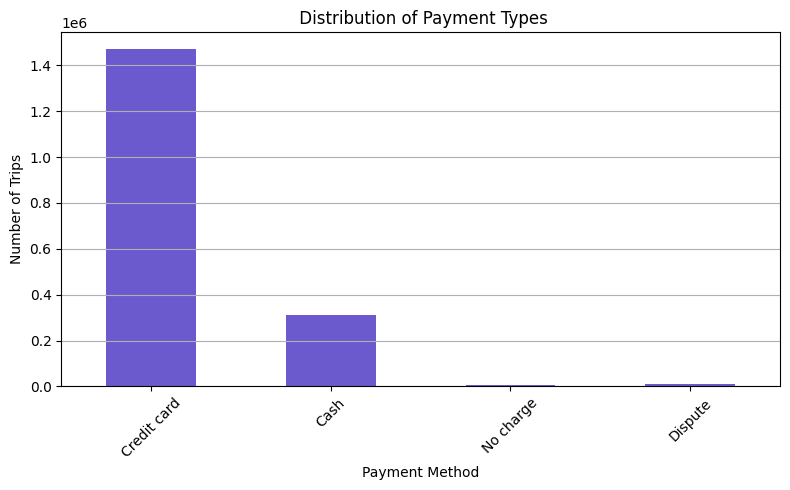

In [100]:
# Analyse the distribution of different payment types (payment_type).
# Count of each payment type

# Step 1: Recalculate value counts from scratch
payment_counts = df['payment_type'].value_counts().sort_index()

# Step 2: Define mapping
payment_labels = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

# Step 3: Map integer index to labels (make sure index is int)
payment_counts.index = payment_counts.index.astype(int).map(payment_labels)

# Step 4: Print result
print("Payment Type Distribution:")
print(payment_counts)
plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='slateblue')

plt.title(" Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [158]:
# import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

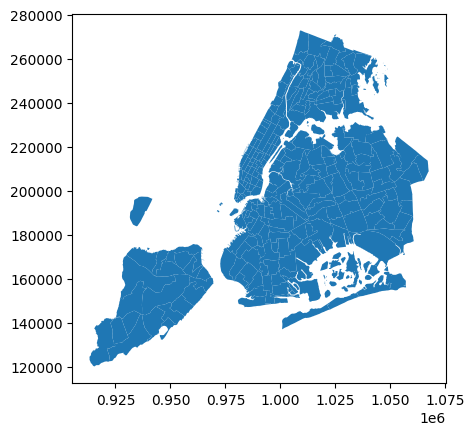

In [106]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [108]:
# Merge zones and trip records using locationID and PULocationID
# Step 1: Rename LocationID in zones for clarity
zones_renamed = zones.rename(columns={'LocationID': 'PULocationID'})

# Step 2: Merge zones with trip records on PULocationID
merged_pickups = df.merge(zones_renamed, on='PULocationID', how='left')

# Step 3: Preview the merged data
print("Merged DataFrame:")
print(merged_pickups[['PULocationID', 'zone', 'borough']].head())

Merged DataFrame:
   PULocationID                       zone    borough
0           138          LaGuardia Airport     Queens
1           161             Midtown Center  Manhattan
2           237      Upper East Side South  Manhattan
3           143        Lincoln Square West  Manhattan
4           246  West Chelsea/Hudson Yards  Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [112]:
# Group data by location and calculate the number of trips
# Group by PULocationID and count trips
pickup_counts = merged_pickups.groupby('PULocationID').size().reset_index(name='trip_count')

# Preview the result
print(pickup_counts.head())
# Merge with zone shapes to prepare for mapping
zones_with_counts = zones.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN (i.e., zones with no pickups) with 0
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)
top_zones = zones_with_counts.sort_values('trip_count', ascending=False)[['zone', 'borough', 'trip_count']]
print("Top Pickup Zones:")
print(top_zones.head(10))

   PULocationID  trip_count
0             1          47
1             2           2
2             4        1781
3             6          22
4             7         685
Top Pickup Zones:
                             zone    borough  trip_count
131                   JFK Airport     Queens     94947.0
236         Upper East Side South  Manhattan     86454.0
160                Midtown Center  Manhattan     85372.0
235         Upper East Side North  Manhattan     77091.0
161                  Midtown East  Manhattan     65192.0
137             LaGuardia Airport     Queens     63687.0
185  Penn Station/Madison Sq West  Manhattan     62982.0
229     Times Sq/Theatre District  Manhattan     60705.0
141           Lincoln Square East  Manhattan     60471.0
169                   Murray Hill  Manhattan     53975.0


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [23]:
# Step 1: Rename LocationID in zones to match PULocationID
zones = gpd.read_file("/content/drive/MyDrive/Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID'})

# Step 2: Merge with trip data (df_clean)
merged_pickups = df.merge(zones_pickup[['PULocationID', 'zone', 'borough']], on='PULocationID', how='left')
# Group and count number of trips by PULocationID
pickup_counts = merged_pickups.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge trip counts into zones
zones_with_trips = zones.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaNs with 0
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1500x1000 with 0 Axes>

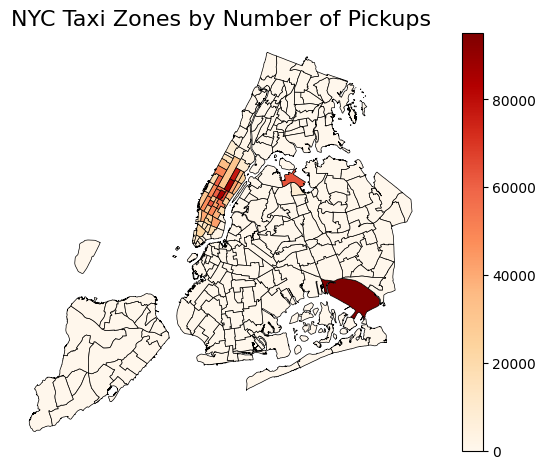

In [115]:
# Define figure and axis
plt.figure(figsize=(15, 10))
zones_with_trips.plot(
    column='trip_count',        # The column to color-code
    cmap='OrRd',                # Color map (Orange-Red gradient)
    legend=True,                # Show color legend
    edgecolor='black',          # Border color for zones
    linewidth=0.5               # Border thickness
)

# Plot the map and display it
plt.title("NYC Taxi Zones by Number of Pickups", fontsize=16)
plt.axis('off')                 # Hide axis lines
plt.tight_layout()
plt.show()

In [117]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by number of trips in descending order
top_zones = zones_with_trips.sort_values(by='trip_count', ascending=False)

# Display the top 10 zones
top_zones[['zone', 'borough', 'trip_count']].head(10)


zone    borough  trip_count
131                   JFK Airport     Queens       94947
236         Upper East Side South  Manhattan       86454
160                Midtown Center  Manhattan       85372
235         Upper East Side North  Manhattan       77091
161                  Midtown East  Manhattan       65192
137             LaGuardia Airport     Queens       63687
185  Penn Station/Madison Sq West  Manhattan       62982
229     Times Sq/Theatre District  Manhattan       60705
141           Lincoln Square East  Manhattan       60471
169                   Murray Hill  Manhattan       53975

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

Slowest routes by hour of day:


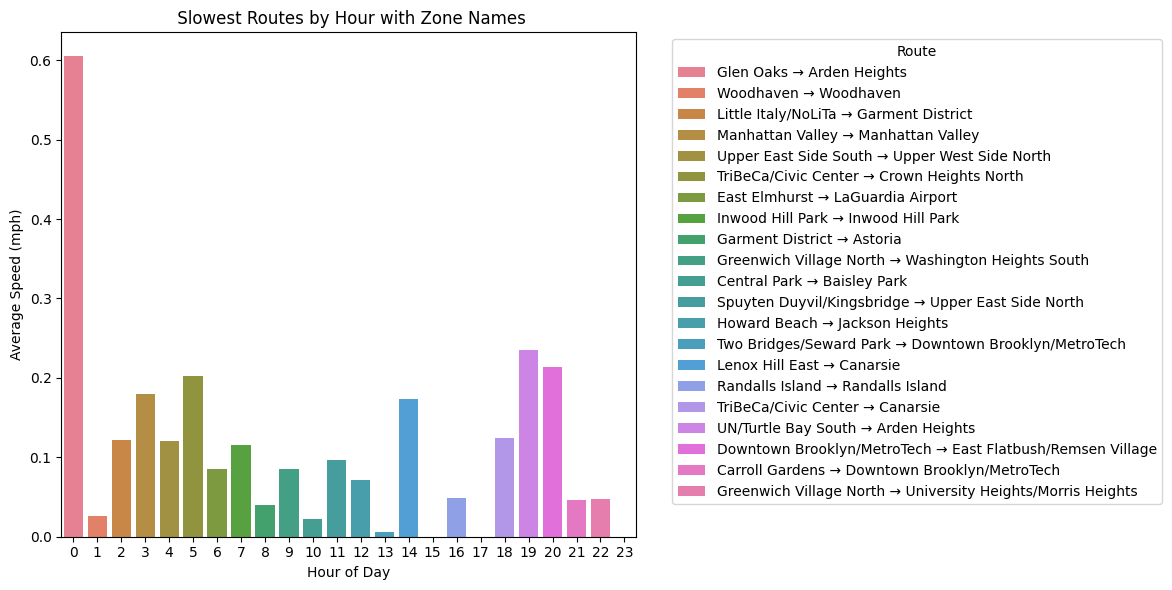

In [33]:
# Find routes which have the slowest speeds at different times of the day
# Add trip duration in hours
df['trip_duration_hr'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Filter out trips with invalid durations or distances
df_speed = df[(df['trip_duration_hr'] > 0) & (df['trip_distance'] > 0)].copy()

# Calculate speed in mph
df_speed['speed_mph'] = df_speed['trip_distance'] / df_speed['trip_duration_hr']

# Extract hour of day
df_speed['hour'] = df_speed['tpep_pickup_datetime'].dt.hour
# Create a route ID as PULocationID → DOLocationID
df_speed['route'] = df_speed['PULocationID'].astype(str) + ' → ' + df_speed['DOLocationID'].astype(str)

# Group by route and hour, calculate average speed
slow_routes = df_speed.groupby(['hour', 'route'])['speed_mph'].mean().reset_index()

# Find slowest route(s) per hour
slowest_by_hour = slow_routes.sort_values(['hour', 'speed_mph']).groupby('hour').first().reset_index()

# Display result
print("Slowest routes by hour of day:")
slowest_by_hour[['hour', 'route', 'speed_mph']]
# Create a lookup dictionary for LocationID → zone name
location_lookup = zones.set_index('LocationID')['zone'].to_dict()

# Split 'route' column into two separate columns
slowest_by_hour[['pickup_id', 'dropoff_id']] = slowest_by_hour['route'].str.split(' → ', expand=True).astype(int)
# Split 'route' column into two separate columns
slowest_by_hour[['pickup_id', 'dropoff_id']] = slowest_by_hour['route'].str.split(' → ', expand=True).astype(int)
# Map IDs to zone names
slowest_by_hour['pickup_zone'] = slowest_by_hour['pickup_id'].map(location_lookup)
slowest_by_hour['dropoff_zone'] = slowest_by_hour['dropoff_id'].map(location_lookup)
slowest_by_hour['route_name'] = slowest_by_hour['pickup_zone'] + ' → ' + slowest_by_hour['dropoff_zone']
# View the updated DataFrame
slowest_by_hour[['hour', 'route_name', 'speed_mph']].head()
plt.figure(figsize=(12, 6))
sns.barplot(data=slowest_by_hour, x='hour', y='speed_mph', hue='route_name', dodge=False)

plt.title(" Slowest Routes by Hour with Zone Names")
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (mph)")
plt.xticks(rotation=0)
plt.legend(title="Route", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

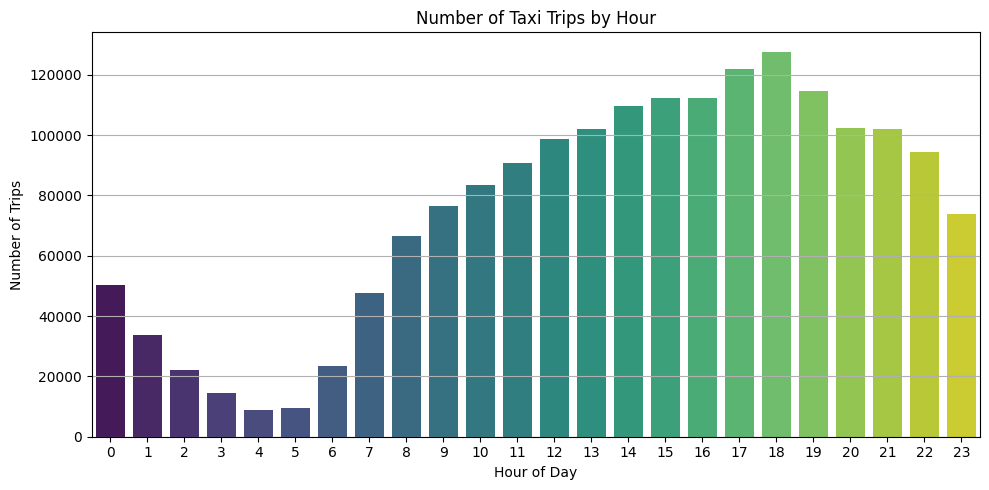

In [121]:
# Visualise the number of trips per hour and find the busiest hour
# Extract pickup hour
df['hour'] = df['tpep_pickup_datetime'].dt.hour
# Group and count
trips_per_hour = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

plt.title("Number of Taxi Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [123]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.10

# Scale trip counts by dividing by the sample fraction
trips_per_hour_scaled = (trips_per_hour / sample_fraction).round().astype(int)

# Display results
print("Estimated Total Trips by Hour (10% Sampling):")
print(trips_per_hour_scaled)

# Find busiest hour in scaled data
busiest_hour_scaled = trips_per_hour_scaled.idxmax()
max_trips = trips_per_hour_scaled.max()
print(f"Estimated busiest hour: {busiest_hour_scaled}:00 with ~{max_trips:,} trips")



Estimated Total Trips by Hour (10% Sampling):
hour
0      504250
1      337310
2      221140
3      143460
4       88830
5       93580
6      234570
7      476680
8      666620
9      763720
10     835880
11     908000
12     986630
13    1019770
14    1095370
15    1123330
16    1122700
17    1217690
18    1276630
19    1146860
20    1023300
21    1020770
22     942270
23     739390
Name: count, dtype: int64
Estimated busiest hour: 18:00 with ~1,276,630 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

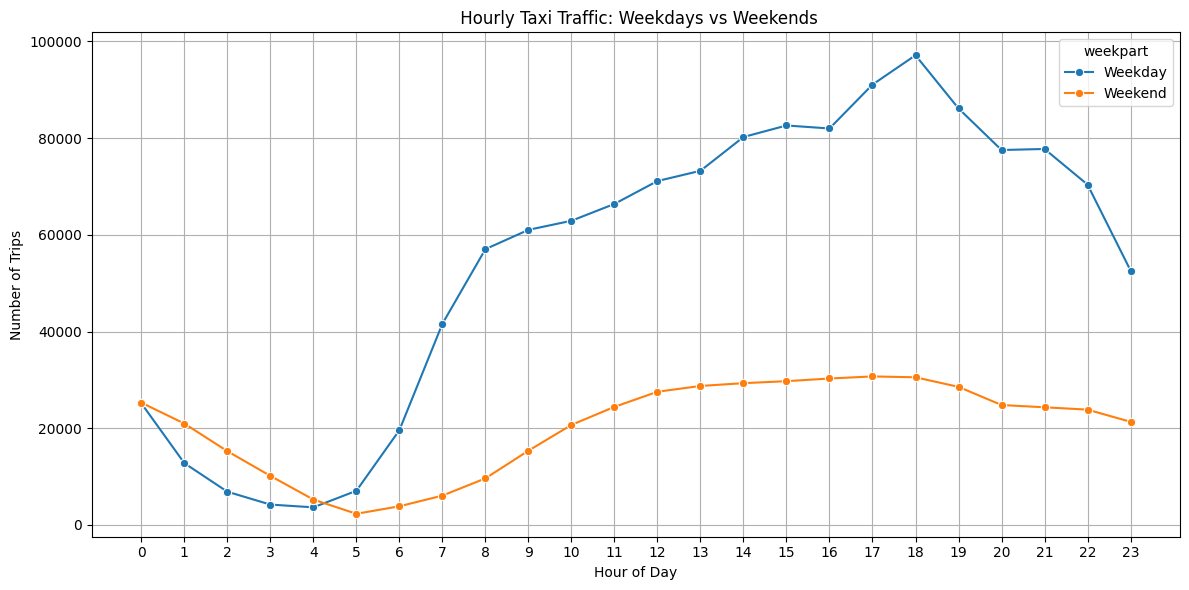

In [124]:
# Compare traffic trends for the week days and weekends
# Extract day name
df['weekday'] = df['tpep_pickup_datetime'].dt.day_name()

# Create a new column to classify weekday/weekend
df['weekpart'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
# Count number of trips by hour and weekpart
trips_by_hour_weekpart = df.groupby(['hour', 'weekpart']).size().reset_index(name='trip_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_by_hour_weekpart, x='hour', y='trip_count', hue='weekpart', marker='o')

plt.title(" Hourly Taxi Traffic: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

 Top 10 Pickup Zones:
pickup_zone
JFK Airport                     97237
Upper East Side South           88615
Midtown Center                  87597
Upper East Side North           79757
Midtown East                    66716
LaGuardia Airport               64552
Penn Station/Madison Sq West    64328
Times Sq/Theatre District       62677
Lincoln Square East             62668
Murray Hill                     55937
Name: count, dtype: int64
 Top 10 Dropoff Zones:
dropoff_zone
Upper East Side North        83444
Upper East Side South        79429
Midtown Center               73730
Times Sq/Theatre District    57971
Murray Hill                  55800
Midtown East                 53703
Lincoln Square East          53043
Upper West Side South        52915
Lenox Hill West              49859
East Chelsea                 47971
Name: count, dtype: int64


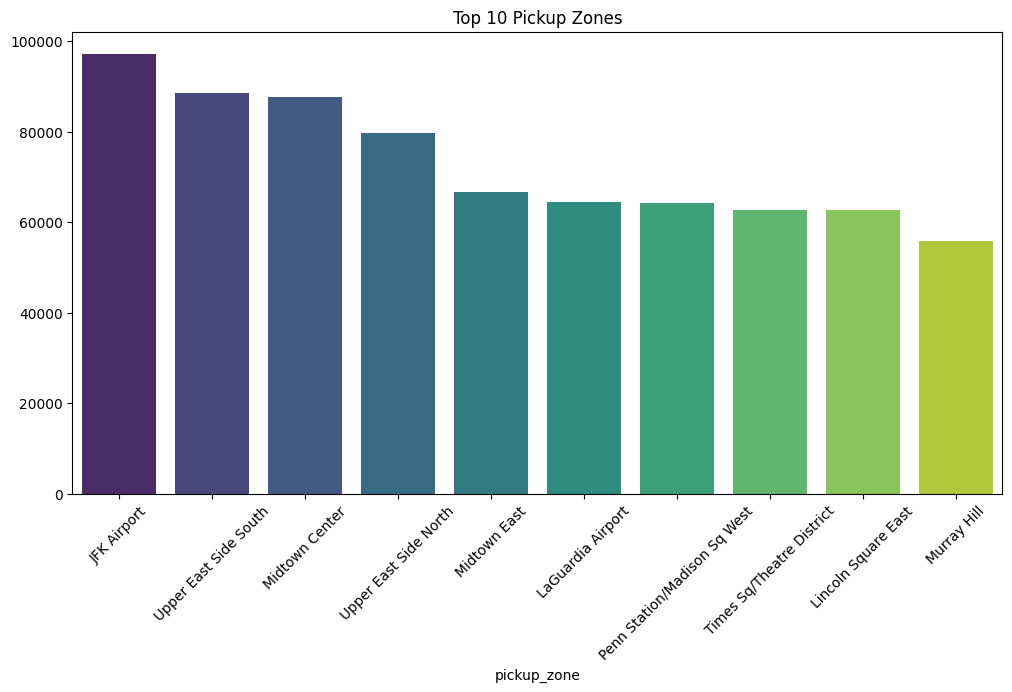

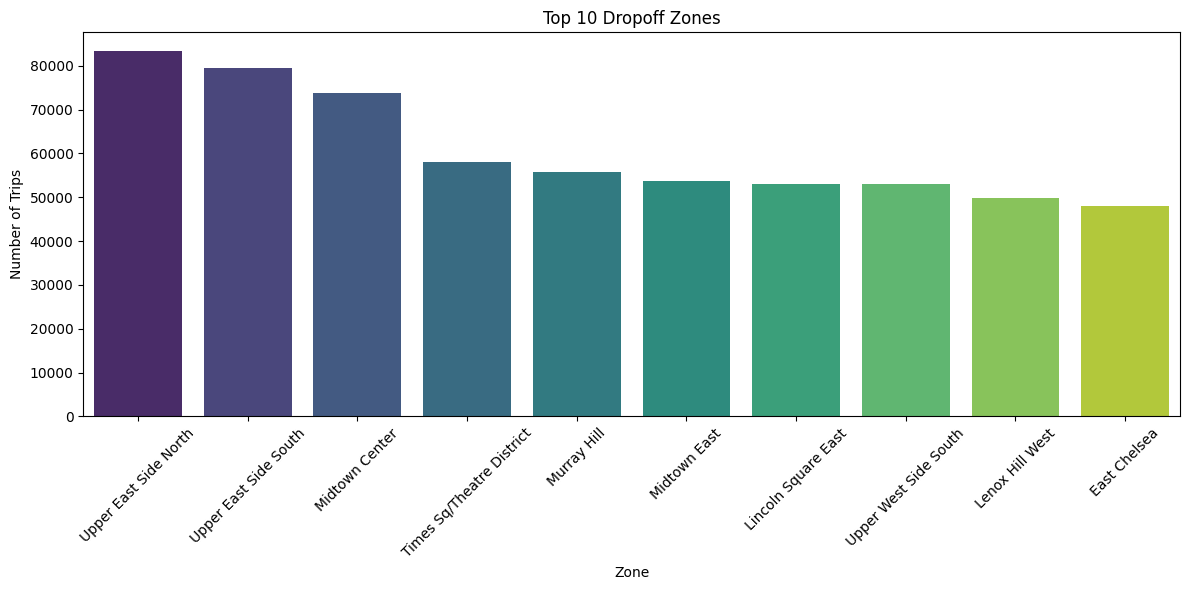

In [41]:
# Find top 10 pickup and dropoff zones
# Rename for clarity
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

# Merge pickup zone
df_zones = df.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')

# Merge dropoff zone
df_zones = df_zones.merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')
top_pickup_zones = df_zones['pickup_zone'].value_counts().head(10)
print(" Top 10 Pickup Zones:")
print(top_pickup_zones)
top_dropoff_zones = df_zones['dropoff_zone'].value_counts().head(10)
print(" Top 10 Dropoff Zones:")
print(top_dropoff_zones)
#plot pickup zone
plt.figure (figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Pickup Zones")
plt.xlabel
#plot dropoff zones
plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [126]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups
pickup_counts = df_zones['pickup_zone'].value_counts().rename("pickup_count")

# Count drop-offs
dropoff_counts = df_zones['dropoff_zone'].value_counts().rename("dropoff_count")

# Combine into one DataFrame
zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
# Avoid division by zero
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count'].replace(0, 1)
# Top 10 zones with highest pickup-to-dropoff ratio
top_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 zones with lowest pickup-to-dropoff ratio
bottom_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio').head(10)
print(" Top 10 Zones (More Pickups than Drop-offs):")
print(top_10_ratio[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print(" Bottom 10 Zones (More Drop-offs than Pickups):")
print(bottom_10_ratio[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


 Top 10 Zones (More Pickups than Drop-offs):
                              pickup_count  dropoff_count  \
East Elmhurst                       8185.0          855.0   
JFK Airport                        95137.0        19325.0   
LaGuardia Airport                  63790.0        21785.0   
Rikers Island                          2.0            0.0   
Penn Station/Madison Sq West       62991.0        39720.0   
Central Park                       30602.0        22220.0   
Greenwich Village South            23974.0        17418.0   
West Village                       40201.0        30261.0   
Midtown East                       65196.0        51824.0   
Midtown Center                     85379.0        71119.0   

                              pickup_dropoff_ratio  
East Elmhurst                             9.573099  
JFK Airport                               4.923001  
LaGuardia Airport                         2.928162  
Rikers Island                             2.000000  
Penn Station/Madis

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Night Hour Pickup Zones:
pickup_zone
East Village                    16468
JFK Airport                     14630
West Village                    13144
Clinton East                    10835
Lower East Side                 10191
Greenwich Village South          9198
Times Sq/Theatre District        8502
Penn Station/Madison Sq West     7138
Midtown South                    6468
East Chelsea                     6402
Name: count, dtype: int64

 Top 10 Night Hour Dropoff Zones:
dropoff_zone
East Village                 8714
Clinton East                 7220
Murray Hill                  6502
East Chelsea                 6134
Gramercy                     5946
Lenox Hill West              5546
Yorkville West               5279
West Village                 5128
Times Sq/Theatre District    4852
Lower East Side              4627
Name: count, dtype: int64


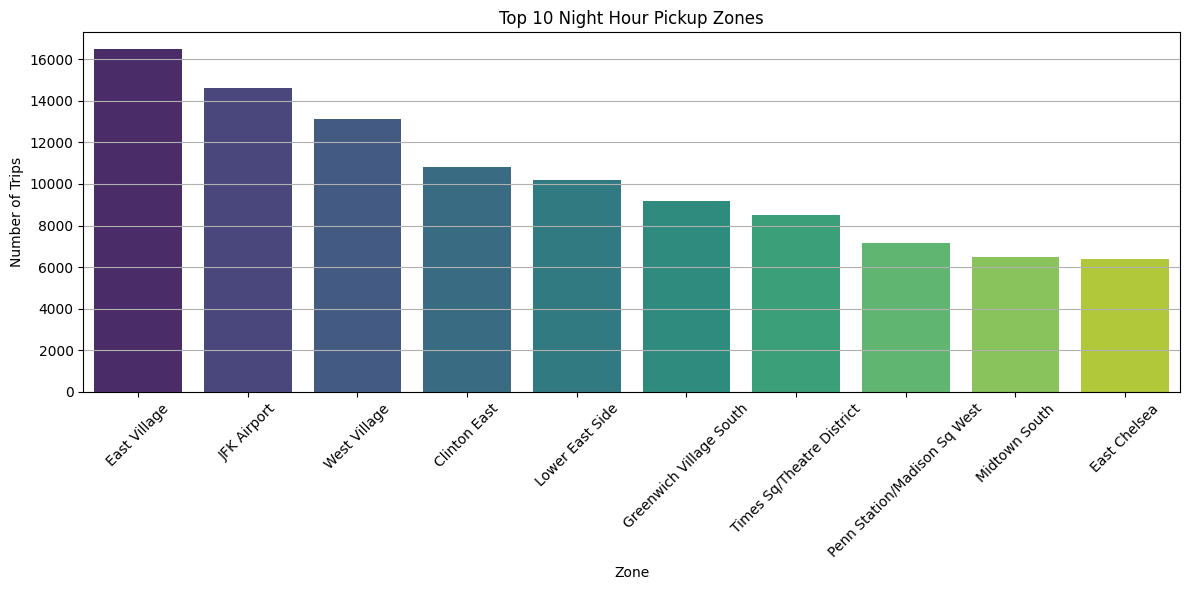

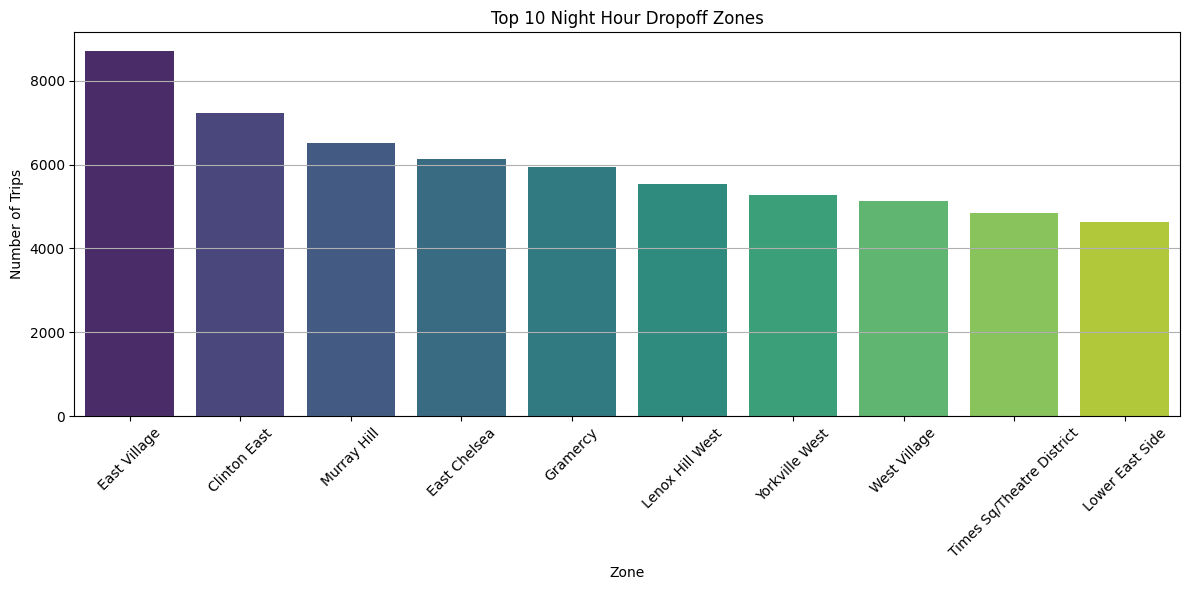

In [43]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Extract hour
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Filter for night trips (from 11 PM to 5 AM)
night_trips = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
# Reuse or redefine zone mappings
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

# Merging pickup and dropoff zone names into night_trips
night_trips = night_trips.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')
night_trips = night_trips.merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')
# Counting pickups
top_night_pickups = night_trips['pickup_zone'].value_counts().head(10)

# Counting dropoffs
top_night_dropoffs = night_trips['dropoff_zone'].value_counts().head(10)

# Displaying
print("Top 10 Night Hour Pickup Zones:")
print(top_night_pickups)

print("\n Top 10 Night Hour Dropoff Zones:")
print(top_night_dropoffs)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_night_pickups.index, y=top_night_pickups.values, palette='viridis')

plt.title("Top 10 Night Hour Pickup Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_night_dropoffs.index, y=top_night_dropoffs.values, palette='viridis')

plt.title("Top 10 Night Hour Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [50]:
# Filter for night hours (11 PM to 5 AM)
day_trips = df[(df['hour'] > 5) & (df['hour'] < 23)]
# Calculate revenue for night and day trips
night_revenue = night_trips['fare_amount'].sum()
day_revenue = day_trips['fare_amount'].sum()
print("Total Revenue for Night Hours:", night_revenue)
print("Total Revenue for Day Hours:", day_revenue)
revenue_share = (night_revenue / (night_revenue + day_revenue)) * 100
print("Revenue Share for Night Hours:", revenue_share, "%")
revenue_share = (day_revenue / (night_revenue + day_revenue)) * 100
print("Revenue Share for Day Hours:", revenue_share, "%")


Total Revenue for Night Hours: 4696236.109999999
Total Revenue for Day Hours: 33083661.369999997
Revenue Share for Night Hours: 12.430515759038528 %
Revenue Share for Day Hours: 87.56948424096147 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

 Average Fare per Mile per Passenger by Passenger Count:
passenger_count
1.0    10.87
2.0     6.43
3.0     3.91
4.0     4.40
5.0     1.71
6.0     1.38
Name: fare_per_mile_per_passenger, dtype: float64


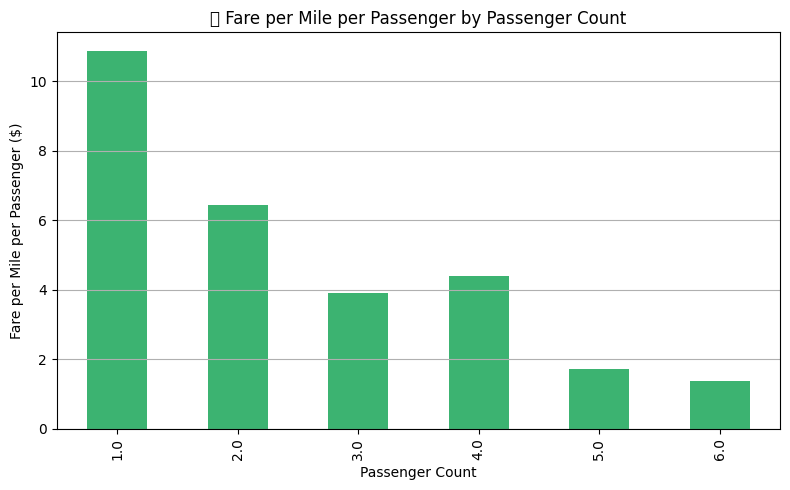

In [130]:
# Analyse the fare per mile per passenger for different passenger counts
# Filtering out invalid trips
df_fare_analysis = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['passenger_count'] > 0)
].copy()
# Calculating fare per mile per passenger
df_fare_analysis['fare_per_mile_per_passenger'] = df_fare_analysis['fare_amount'] / (df_fare_analysis['trip_distance'] * df_fare_analysis['passenger_count'])
# Grouping and calculating average fare per mile per passenger
fare_efficiency = df_fare_analysis.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().round(2)

# Displaying the result
print(" Average Fare per Mile per Passenger by Passenger Count:")
print(fare_efficiency)
plt.figure(figsize=(8, 5))
fare_efficiency.plot(kind='bar', color='mediumseagreen')

plt.title("Fare per Mile per Passenger by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile per Passenger ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Day of the Week:
weekday
Monday       11.00
Tuesday      11.40
Wednesday    11.13
Thursday     11.28
Friday       10.91
Saturday     10.93
Sunday       12.57
Name: fare_per_mile, dtype: float64


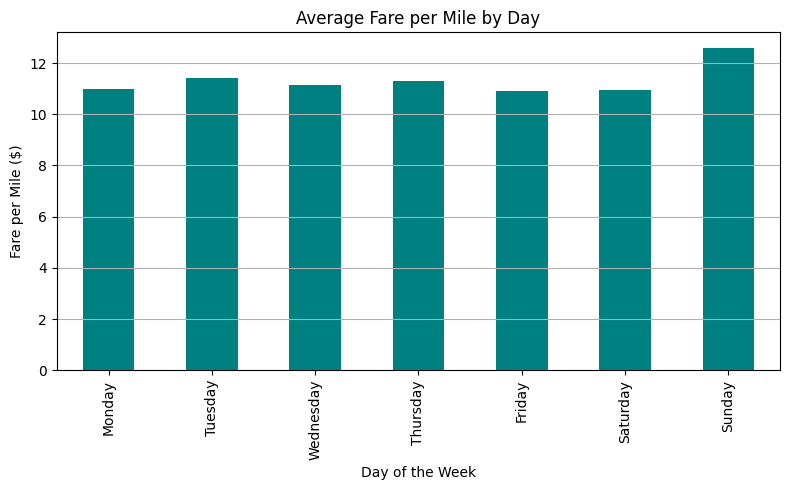


 Average Fare per Mile by Hour of Day:
hour
0     10.53
1     11.26
2      9.94
3     10.88
4     13.97
5     14.50
6     11.32
7     10.31
8     10.40
9     10.41
10    10.71
11    10.98
12    12.08
13    12.03
14    11.70
15    12.51
16    13.94
17    11.97
18    11.54
19    11.62
20     9.59
21     9.52
22    10.15
23    10.75
Name: fare_per_mile, dtype: float64


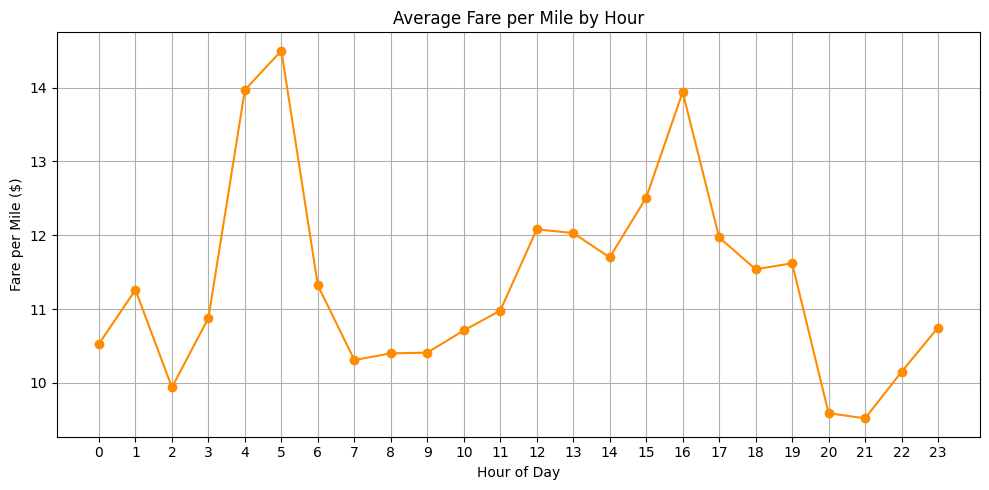

In [132]:
# Compare the average fare per mile for different days and for different times of the day

# Filter trips with valid fare and distance
df_fare_mile = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()
df_fare_mile['fare_per_mile'] = df_fare_mile['fare_amount'] / df_fare_mile['trip_distance']
df_fare_mile['weekday'] = df_fare_mile['tpep_pickup_datetime'].dt.day_name()
fare_by_day = df_fare_mile.groupby('weekday')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).round(2)

print("Average Fare per Mile by Day of the Week:")
print(fare_by_day)
fare_by_day.plot(kind='bar', color='teal', figsize=(8, 5), title='Average Fare per Mile by Day')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Day of the Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
df_fare_mile['hour'] = df_fare_mile['tpep_pickup_datetime'].dt.hour
fare_by_hour = df_fare_mile.groupby('hour')['fare_per_mile'].mean().round(2)

print("\n Average Fare per Mile by Hour of Day:")
print(fare_by_hour)
fare_by_hour.plot(kind='line', marker='o', color='darkorange', figsize=(10, 5), title='Average Fare per Mile by Hour')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by Vendor:
VendorID
CMT          8.09
VeriFone    12.41
Name: fare_per_mile, dtype: float64


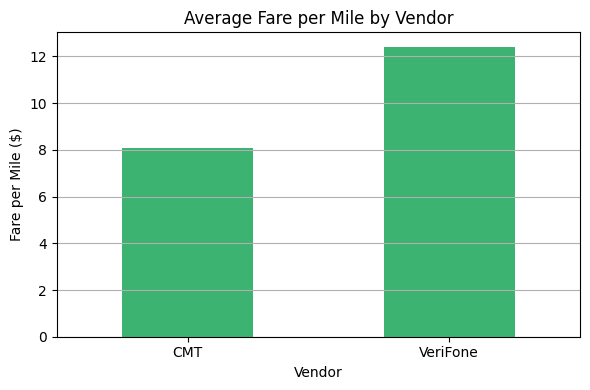

In [133]:
# Compare fare per mile for different vendors

# Keep only trips with valid fare and trip distance
df_vendor_fare = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()
df_vendor_fare['fare_per_mile'] = df_vendor_fare['fare_amount'] / df_vendor_fare['trip_distance']
# Calculate average fare per mile by VendorID
fare_by_vendor = df_vendor_fare.groupby('VendorID')['fare_per_mile'].mean().round(2)

# Map vendor names
vendor_names = {1: 'CMT', 2: 'VeriFone'}
fare_by_vendor.index = fare_by_vendor.index.map(vendor_names)

print("Average Fare per Mile by Vendor:")
print(fare_by_vendor)
fare_by_vendor.plot(kind='bar', color='mediumseagreen', figsize=(6, 4))

plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Fare per Mile ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Tiered Average Fare per Mile by Vendor:
distance_tier  0–2 miles  2–5 miles  >5 miles
VendorID                                     
CMT                 9.79       6.37      4.46
VeriFone           17.94       6.55      4.50


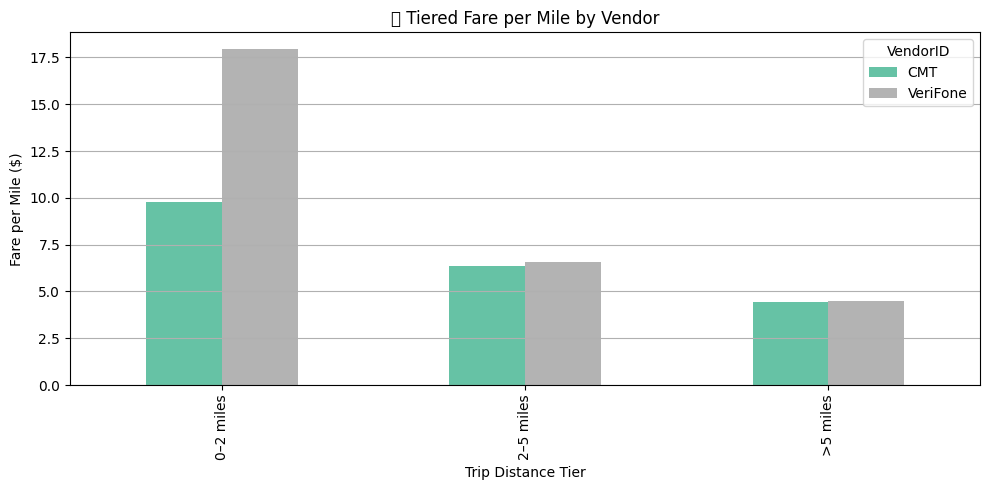

In [135]:
# Defining distance tiers
# Filtering valid trips
df_tiered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

# Creating distance tiers
df_tiered['distance_tier'] = pd.cut(
    df_tiered['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['0–2 miles', '2–5 miles', '>5 miles']
)
df_tiered['fare_per_mile'] = df_tiered['fare_amount'] / df_tiered['trip_distance']
# Group by vendor and distance tier
tiered_fare = df_tiered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().round(2).unstack()

# Rename VendorID
vendor_map = {1: 'CMT', 2: 'VeriFone'}
tiered_fare.index = tiered_fare.index.map(vendor_map)

# Show result
print("Tiered Average Fare per Mile by Vendor:")
print(tiered_fare)
tiered_fare.T.plot(kind='bar', figsize=(10, 5), colormap='Set2')
plt.title("Tiered Fare per Mile by Vendor")
plt.ylabel("Fare per Mile ($)")
plt.xlabel("Trip Distance Tier")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

 Tip % by Distance Tier:
distance_tier
0–2 mi     22.45
2–5 mi     18.85
5–10 mi    19.84
>10 mi     16.08
Name: tip_percent, dtype: float64


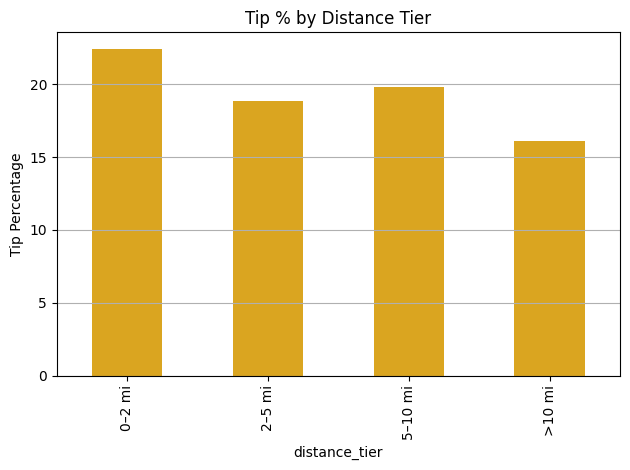


 Tip % by Passenger Count:
passenger_count
1.0    21.07
2.0    19.73
3.0    19.02
4.0    17.46
5.0    20.49
6.0    20.60
Name: tip_percent, dtype: float64


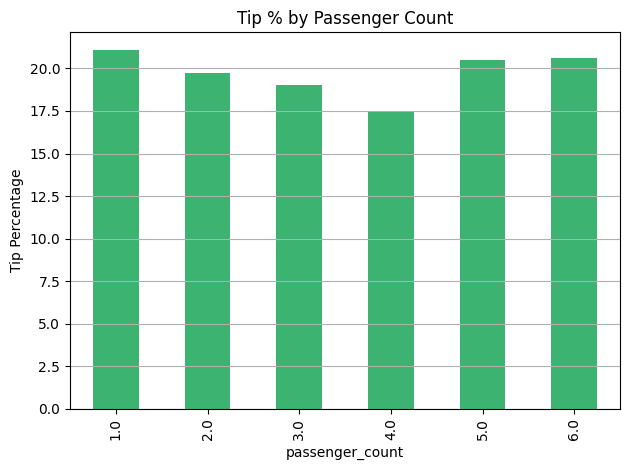


Tip % by Hour of Day:
hour
0     20.51
1     20.67
2     20.66
3     20.42
4     18.59
5     18.17
6     18.93
7     19.88
8     20.28
9     19.93
10    19.45
11    19.39
12    19.30
13    19.19
14    19.12
15    19.09
16    21.00
17    24.58
18    22.27
19    22.21
20    21.51
21    21.53
22    21.30
23    20.67
Name: tip_percent, dtype: float64


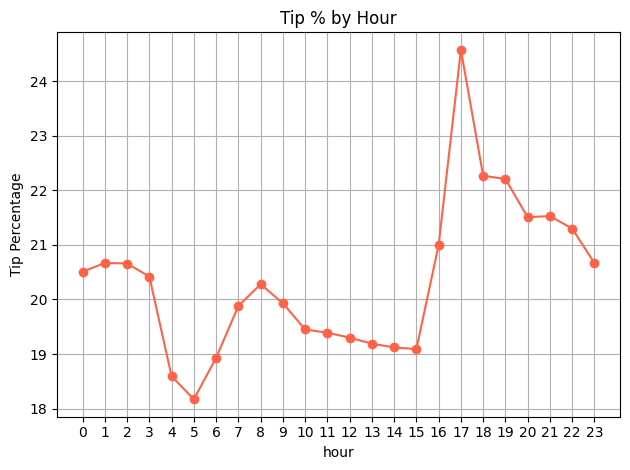

In [147]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Filter valid trips
df_tip = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()

# Calculate tip percentage
df_tip['tip_percent'] = (df_tip['tip_amount'] / df_tip['fare_amount']) * 100
df_tip['distance_tier'] = pd.cut(
    df_tip['trip_distance'],
    bins=[0, 2, 5, 10, float('inf')],
    labels=['0–2 mi', '2–5 mi', '5–10 mi', '>10 mi']
)

# Average tip % by distance tier
tip_by_distance = df_tip.groupby('distance_tier')['tip_percent'].mean().round(2)

print(" Tip % by Distance Tier:")
print(tip_by_distance)
tip_by_distance.plot(kind='bar', color='goldenrod', title='Tip % by Distance Tier')
plt.ylabel("Tip Percentage")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
tip_by_passenger = df_tip.groupby('passenger_count')['tip_percent'].mean().round(2)

print("\n Tip % by Passenger Count:")
print(tip_by_passenger)
tip_by_passenger.plot(kind='bar', color='mediumseagreen', title='Tip % by Passenger Count')
plt.ylabel("Tip Percentage")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df_tip['hour'] = df_tip['tpep_pickup_datetime'].dt.hour

tip_by_hour = df_tip.groupby('hour')['tip_percent'].mean().round(2)

print("\nTip % by Hour of Day:")
print(tip_by_hour)

tip_by_hour.plot(kind='line', marker='o', color='tomato', title='Tip % by Hour')
plt.ylabel("Tip Percentage")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour of Day:
hour
0     1.43
1     1.43
2     1.45
3     1.46
4     1.41
5     1.31
6     1.26
7     1.28
8     1.30
9     1.32
10    1.36
11    1.37
12    1.39
13    1.39
14    1.40
15    1.41
16    1.41
17    1.39
18    1.38
19    1.39
20    1.40
21    1.43
22    1.43
23    1.42
Name: passenger_count, dtype: float64


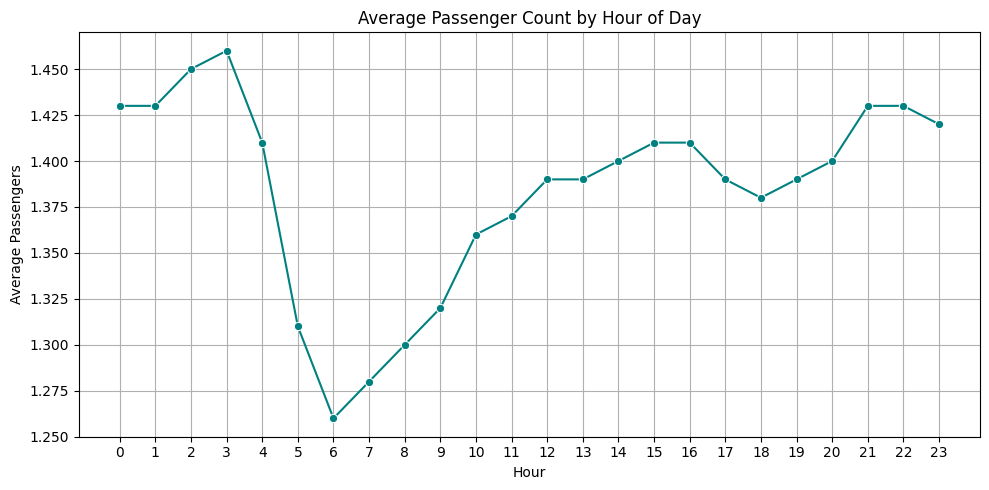

In [143]:
# See how passenger count varies across hours and days
# Group and calculate mean
passenger_by_hour = df.groupby('hour')['passenger_count'].mean().round(2)
print("Average Passenger Count by Hour of Day:")
print(passenger_by_hour)
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=passenger_by_hour.index, y=passenger_by_hour.values, marker='o', color='teal')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Passengers")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Zones by Average Passenger Count:
pickup_zone
Ocean Parkway South       6.00
Pelham Bay                2.50
Gravesend                 2.40
Jamaica Estates           2.25
Madison                   2.20
Manhattan Beach           2.00
Country Club              2.00
Fresh Meadows             2.00
Rockaway Park             2.00
West Farms/Bronx River    2.00
Name: passenger_count, dtype: float64


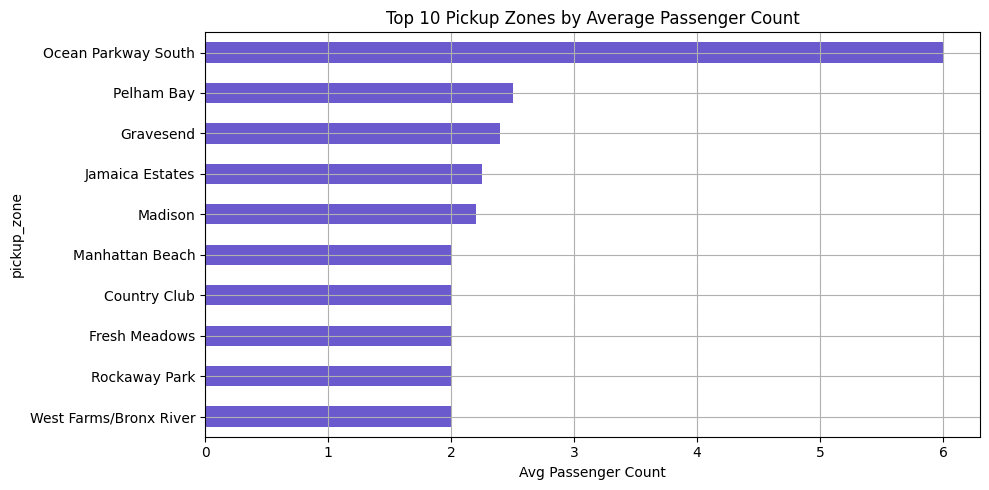

In [148]:
# How does passenger count vary across zones

passenger_by_zone = df_zones.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False).round(2)

# Show top 10 zones by average passenger count
print("Top 10 Zones by Average Passenger Count:")
print(passenger_by_zone.head(10))

passenger_by_zone.head(10).plot(kind='barh', figsize=(10, 5), color='slateblue')
plt.title("Top 10 Pickup Zones by Average Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

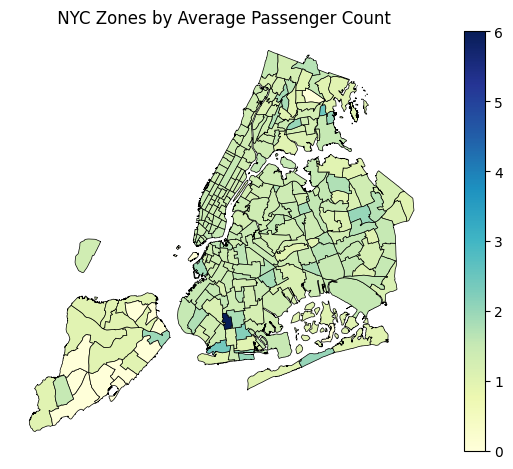

In [150]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone['avg_passenger_count'] = avg_passenger_by_zone['passenger_count'].round(2)
avg_passenger_by_zone.drop(columns='passenger_count', inplace=True)
# Merge into zones GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, on='PULocationID', how='left')

# Fill NaN (zones with no trips) with 0
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)
# Show zone, trip count, and average passengers
zones_with_trips[['zone', 'borough', 'trip_count', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10)
plt.figure(figsize=(15, 10))
zones_with_trips.plot(
    column='avg_passenger_count',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

plt.title(" NYC Zones by Average Passenger Count")
plt.axis('off')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

 extra: applied in 1,126,886 trips (62.64%)
 mta_tax: applied in 1,787,482 trips (99.37%)
 improvement_surcharge: applied in 1,798,834 trips (100.00%)
 congestion_surcharge: applied in 1,680,283 trips (93.41%)
 airport_fee: applied in 158,803 trips (8.83%)


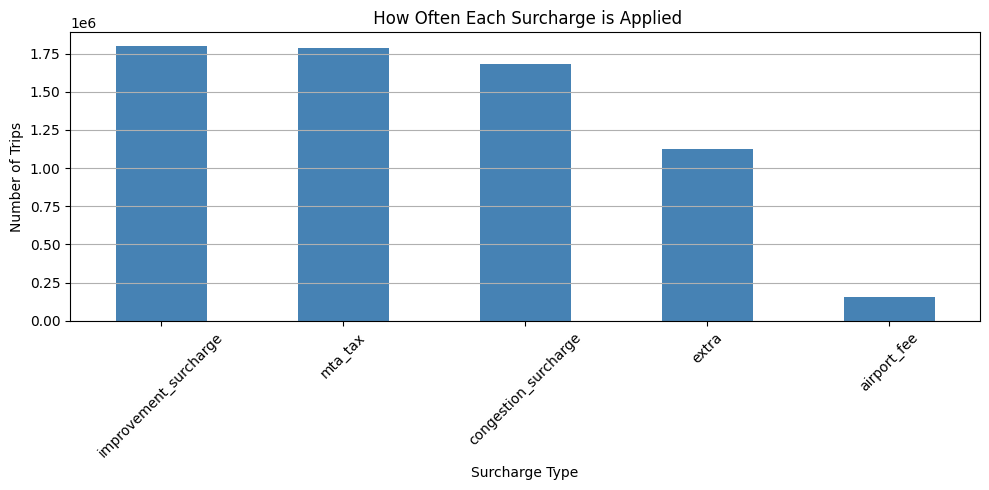

In [155]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
# Count non-zero values
for col in surcharge_cols:
    count_applied = (df[col] > 0).sum()
    percentage = (count_applied / len(df)) * 100
    print(f" {col}: applied in {count_applied:,} trips ({percentage:.2f}%)")
    surcharge_counts = {col: (df[col] > 0).sum() for col in surcharge_cols}

surcharge_df = pd.DataFrame.from_dict(surcharge_counts, orient='index', columns=['count'])
surcharge_df['percentage'] = (surcharge_df['count'] / len(df)) * 100
surcharge_df = surcharge_df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 5))
surcharge_df['count'].plot(kind='bar', color='steelblue')

plt.title(" How Often Each Surcharge is Applied")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Deploy More Taxis to High-Demand Zones**

Zones like JFK Airport, LaGuardia, Penn Station, and Midtown have high pickup activity, especially during night hours.

**Recommendation**: Pre-position taxis in these zones during peak hours (morning/evening commute and late-night hours on weekends).

**Align Supply with Hourly Demand Peaks**

Demand peaks between 5 PM – 8 PM and late night (11 PM – 2 AM).

**Recommendation**: Increase active fleet during these times to reduce wait times and missed trip opportunities.

**Dynamic Dispatch Based on Weekday vs Weekend Patterns**

Weekends show later peaks and higher group travel (higher average passengers at night).

**Recommendation**: Route more taxis to nightlife zones (e.g., Greenwich Village, East Village) on Friday/Saturday nights.

**Dedicated Airport Dispatch Pools**

Airports (JFK, LGA) show a huge imbalance — many pickups, few drop-offs.

**Recommendation**:

Create airport-specific dispatch queues.

Consider dedicated lanes or incentives for airport pickups/drop-offs.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Time-Based Shifts in Deployment**

Morning (6–10 AM): Focus on residential areas (e.g., Upper East/West Side, Queens) for work commutes.

Afternoon (12–4 PM): Reallocate to commercial areas, shopping zones, and medical centers.

Evening & Night (8 PM–2 AM): Shift toward entertainment zones like West Village, SoHo, East Village.

**Weekday vs Weekend Strategy**

Weekdays: Emphasize commute zones, major office hubs, and transit points.

Weekends: Focus on recreation, nightlife, and tourism hotspots (e.g., Brooklyn Bridge Park, Central Park, Greenwich Village).

Increase cab availability in boroughs like Brooklyn and Queens during Saturday/Sunday brunch and shopping hours (11 AM–3 PM).

**Avoid Over-Servicing Low-Demand Zones**

Zones like Freshkills Park, Broad Channel, and parts of Staten Island show minimal taxi activity.

Recommendation: Only send cabs here on-demand, or during event-specific times. Avoid stationing idle cabs in these zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Implementing Fare Multipliers According to Trip Distance.**

**Observation**: The cost per mile for short-distance travel (0-2 miles) is significantly more than longer durations.

**Suggestion**:

For extremely brief trips (< 2 miles), consider increasing the base fare or the per mile fee, due to their greater profit potential.

Increase cap or discount rates for longer routes (>10 miles) to stay competitive and incentivize airport or borough-to-borough rides.

**Put into Effect Price Changes Depending on the Time of the Day**

Observation: High demand noted during:

Peak hours (7–10 AM, 5–8 PM)

Weekend late-night hours (9 PM–2 AM)

Suggestion: Adjust fares by adding premium pricing during peak times to:

Boost revenues in periods of high demand

Promote increased driver supply

**Optimize the Strategies for Fixed Rates**

**Observation**: Fixed-rate segments (for example, airport to Manhattan) may occasionally perform below expectations regarding revenue earned per mile driven.

**Suggestion**: Reanalyze and modify flat rates on a yearly basis with the use of average fare per mile statistics to guarantee profiting while remaining cost-effective and honest towards the passengers.